In [1]:
import tensorflow as tf
from tensorflow.keras.models import load_model

model = load_model(r'H:\BrainTumor\brain_tumor_cnn.keras')
model.summary()


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 158, 158, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 79, 79, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 77, 77, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 38, 38, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 92416)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 32)             │     2,957,344 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 64)             │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,938,496 (34.10 MB)

 Trainable params: 2,979,498 (11.37 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,958,998 (22.73 MB)

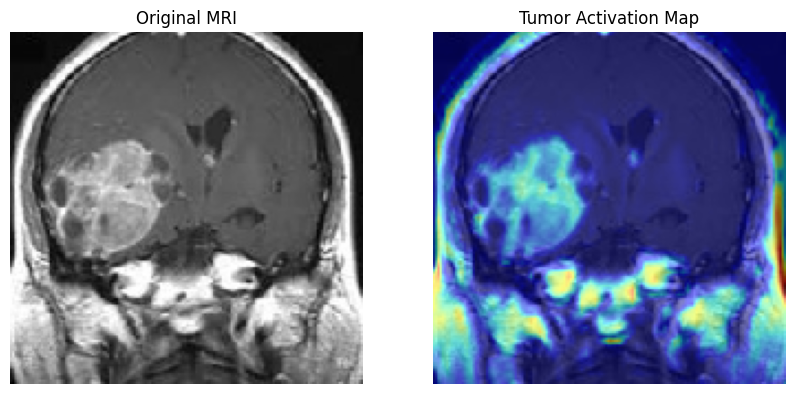

In [5]:
import tensorflow as tf
from tf_keras_vis.gradcam import Gradcam
import matplotlib.pyplot as plt
import numpy as np

# 1. Load your pre-trained model
# model = tf.keras.models.load_model('brain_tumor_model.h5')

# 2. Prepare your MRI image
def load_and_preprocess(img_path):
    img = tf.keras.utils.load_img(img_path, target_size=(160, 160))
    img_array = tf.keras.utils.img_to_array(img) / 255.0
    return np.expand_dims(img_array, axis=0)

img_array = load_and_preprocess('H:\CNN\Grad Cam\MRI2.jpg')

# 3. Set up Grad-CAM
def model_modifier(cloned_model):
    cloned_model.layers[-1].activation = tf.keras.activations.linear
    return cloned_model

gradcam = Gradcam(model, model_modifier=model_modifier)

# 4. Generate heatmap (target tumor class)
def loss(output):
    return output[:, 1]  # Assuming tumor is class 1

heatmap = gradcam(loss, img_array, penultimate_layer=-1)

# 5. Visualize results
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original MRI")
plt.axis('off')
plt.imshow(img_array[0])

plt.subplot(1, 2, 2)
plt.title("Tumor Activation Map")
plt.imshow(img_array[0])
plt.axis('off')
plt.imshow(heatmap[0], cmap='jet', alpha=0.5)
plt.axis('off')
plt.show()

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
!pip install "tensorflow>=2.8" "tf-keras-vis"


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip
